In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [9]:
# folder = r"C:\Users\jmsch\2025-06-02_wflow_qgis"

# # Read the CSV file
# calibrated = pd.read_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps\fx0.4_tsx8_khx.05_kvx3_L50\output.csv", sep=",")
# reforest_sc2 = pd.read_csv(f"{folder}/wflow_reforest_sc2/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# reforest_sc3 = pd.read_csv(f"{folder}/wflow_reforest_sc3/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# reforest_sc4 = pd.read_csv(f"{folder}/wflow_reforest_sc4/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# reforest_sc8 = pd.read_csv(f"{folder}/wflow_reforest_sc8//fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# complete_forest = pd.read_csv(f"{folder}/wflow_reforest_complete/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")

# Q_list = [calibrated, reforest_sc2, reforest_sc3, reforest_sc4, reforest_sc8, complete_forest]
# Q_list = [Q.set_index("time") for Q in Q_list]


In [10]:
# import scipy.stats as stats

# scenario_names = ["Calibrated", "Reforestation SC2", "Reforestation SC3", "Reforestation SC4", "Reforestation SC8", "Complete Forest"]
# all_return_periods = {}
# gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8', 'Q_17']

# return_periods = [2, 5, 10]
# probabilities = [1 - 1/t for t in return_periods]

# for Q, scenario in zip(Q_list, scenario_names):
#     results = []
#     for gauge in gauges:
#         Q_series = Q[gauge]
#         Q_series.index = pd.to_datetime(Q_series.index)
#         Q_series = Q_series[Q_series.index >= "2007-01-01"]
#         annual_maxima = Q_series.resample('Y').max().dropna()
#         params = stats.gumbel_r.fit(annual_maxima)
#         discharge_return_levels = stats.gumbel_r.ppf(probabilities, *params)
#         for T, Q_val in zip(return_periods, discharge_return_levels):
#             results.append({'Gauge': gauge, 'ReturnPeriod': T, 'Discharge_m3s': Q_val})
#     df_return_periods = pd.DataFrame(results)

#     # Adjust Q_17 and Q_2 for all return periods
#     df_return_periods_adj = df_return_periods.copy()
#     for T in return_periods:
#         Q_17_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_17') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]
#         Q_3_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_3') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]
#         Q_2_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_2') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]

#         # Q_17 = initial Q_17 - initial Q_3
#         df_return_periods_adj.loc[
#             (df_return_periods_adj['Gauge'] == 'Q_17') & (df_return_periods_adj['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ] = Q_17_init - Q_3_init

#         # Q_2 = initial Q_2 - initial Q_17
#         df_return_periods_adj.loc[
#             (df_return_periods_adj['Gauge'] == 'Q_2') & (df_return_periods_adj['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ] = Q_2_init - Q_17_init

#     # Store adjusted DataFrame
#     all_return_periods[scenario] = df_return_periods_adj

# # Example: display results for one scenario
# display(all_return_periods)


In [11]:
# import numpy as np
# import pandas as pd
# from scipy.stats import gumbel_r

# gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']
# return_periods = [2, 5, 10]  # in years

# scenario_names = ["Calibrated", "Reforestation SC2", "Reforestation SC3", "Reforestation SC4", "Reforestation SC8", "Complete Forest"]

# for Q in Q_list:
#     Q['Q_2'] = Q['Q_2'] -  Q['Q_17']
#     Q['Q_17'] = Q['Q_17'] -  Q['Q_3']

# all_results = {}

# for Q, scenario in zip(Q_list, scenario_names):
#     Q_ = Q.copy()
#     Q_.index = pd.to_datetime(Q_.index)
#     result = {}
#     for gauge in gauges:
#         # Get annual maxima
#         annual_max = Q_[gauge].resample('YE').max().dropna()
#         # Fit Gumbel distribution
#         loc, scale = gumbel_r.fit(annual_max)
#         rp_values = []
#         for T in return_periods:
    
#             F = 1 - 1/T
#             x_T = gumbel_r.ppf(F, loc=loc, scale=scale)
#             rp_values.append(x_T)
#         result[gauge] = rp_values
#     df = pd.DataFrame(result, index=return_periods)
#     df.index.name = "Return period (years)"
#     all_results[scenario] = df

# # Display results for each scenario
# for scenario, df in all_results.items():
#     print(f"\nGumbel return period discharge for scenario: {scenario}")
#     print(df)

In [12]:
# # Assume all_results and calibrated_df are already defined as before

# calibrated_df = all_results["Calibrated"]

# reforest_scenarios = ["Reforestation SC2", "Reforestation SC3", "Reforestation SC4", "Reforestation SC8"]
# reforest_gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']

# fraction_results = {}

# # For each reforestation scenario, show only the fraction for the corresponding gauge

# for scenario, gauge in zip(reforest_scenarios, reforest_gauges):
#     reforest_df = all_results[scenario]
#     # Calculate the fraction that remains, rounded to 2 decimals
#     fraction = (reforest_df[gauge] / calibrated_df[gauge]).round(2)
#     fraction_results[scenario] = fraction
#     print(f"\nFraction of Q remaining for {scenario} vs Calibrated (gauge {gauge}):")
#     print(fraction)

# # For the complete reforestation scenario, show the fraction for all gauges, rounded to 2 decimals
# complete_df = all_results["Complete Forest"]
# fraction_complete = (complete_df / calibrated_df).round(2)
# fraction_results["Complete Forest"] = fraction_complete
# print("\nFraction of Q remaining for Complete Forest vs Calibrated (all gauges):")
# print(fraction_complete)

In [13]:
# import glob
# import pandas as pd
# import os

# path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python"
# return_periods = [2, 5, 10]  # in years
# scale_factors = [0.8, 0.6, 0.4, 0.2, 0.0]

# dfs = []
# csv_files = []

# for return_period in return_periods:
#     # Find all CSV files for this return period
#     files = glob.glob(os.path.join(path, f"percent_decrease_T{return_period}.csv"))
#     csv_files.extend(files)
#     for f in files:
#         df = pd.read_csv(f)
        
#         for col in ['index', 'Q_5', 'Q_6', 'Q_7', 'Q_14', 'Q_17']:
#             if col in df.columns:
#                 df.drop(columns=col, inplace=True)
        
#         # Round gauge columns to 2 decimals (assuming all except 'scale_factor')
#         gauge_cols = [col for col in df.columns if col not in ['scale_factor']]
#         df[gauge_cols] = df[gauge_cols].round(2)

#         df['scale_factor'] = scale_factors[:len(df)]
#         dfs.append(df)

# print(f"Loaded {len(dfs)} files:")
# for f in csv_files:
#     print(f)

In [14]:
# display(dfs[0].head())  # Display the first few rows of the first DataFrame as an example

In [15]:
# for df in dfs:
#     gauge_cols = [col for col in df.columns if col != 'scale_factor' and col!= 'scenario']
#     plt.figure(figsize=(8, 5))
#     for gauge in gauge_cols:
#         plt.plot(df['scale_factor'], df[gauge], marker='o', label=f'{gauge}_{df["scenario"].iloc[0]}' if 'scenario' in df.columns else gauge)

#     plt.xlabel('Scale factor', fontsize=12)
#     plt.ylabel('Value', fontsize=12)
#     plt.title(f'Gauges vs Scale factor for {df['scenario'].iloc[0]}', fontsize=14)
#     plt.legend(title='Gauge')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [16]:
import glob
import os
import re
import numpy as np
import pandas as pd

path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50\2025-01-06 Interventions"
path_baseline = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50"

baseline_file = os.path.join(path_baseline, "SWMM_Nakuru_wflow_forcing_reswmm_T_5_xsec_bar2.rpt")

# Find all .rpt files with 'T_5_SC' in the name
rpt_files = glob.glob(os.path.join(path, "*T_5_SC*.rpt"))

print(f"Loaded {len(rpt_files)} rpt files:")
for f in rpt_files:
    print(f)

# ──────────────────────────────────────────────────────────────────────────
# 2.  SUM FLOOD VOLUMES (ML) FROM THE REPORT
# ──────────────────────────────────────────────────────────────────────────
def parse_total_flood_volume(rpt_file):
    with open(rpt_file, "r", encoding="latin-1") as f:
        lines = f.readlines()

    start, end = None, None
    for i, line in enumerate(lines):
        if "Node Flooding Summary" in line:
            start = i + 7                 # header offset OK
        elif start and ("Outfall Loading Summary" in line or "END OF REPORT" in line):
            end = i
            break

    total_volume = 0.0
    for line in lines[start:end]:
        if not line.strip():
            continue
        parts = re.split(r"\s+", line.strip())
        try:
            total_volume += float(parts[-2])   # second‑to‑last = ML
        except (ValueError, IndexError):
            continue

    return total_volume

Loaded 8 rpt files:
C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50\2025-01-06 Interventions\SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC14.rpt
C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50\2025-01-06 Interventions\SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC2.rpt
C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50\2025-01-06 Interventions\SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC3.rpt
C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\SWMM\2025-05-16 INP files\Return_Periods_5_10_50\2025-01-06 Interv

In [17]:
simulation_volumes = []
simulation_names = [os.path.basename(f).replace("SWMM_Nakuru_wflow_forcing_reswmm_", "").replace(".rpt", "") for f in rpt_files]

for rpt_file in rpt_files:
    total_volume = parse_total_flood_volume(rpt_file)
    print(f"Total flood volume for {os.path.basename(rpt_file)}: {total_volume:.2f} ML")
    simulation_volumes.append(total_volume)

baseline_flood_volume = parse_total_flood_volume(baseline_file)
print(f"Baseline flood volume: {baseline_flood_volume:.2f} ML")

Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC14.rpt: 2082.60 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC2.rpt: 2017.05 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC3.rpt: 2082.81 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC4.rpt: 2097.54 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC5.rpt: 2111.02 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC6.rpt: 2097.95 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC7.rpt: 2110.40 ML
Total flood volume for SWMM_Nakuru_wflow_forcing_reswmm_NBS_T_5_SC8.rpt: 2080.46 ML
Baseline flood volume: 2136.78 ML


In [18]:
# Assume you have a list of simulation results and a baseline value
#simulation_volumes = [volume1, volume2, ...], 
baseline_volume = baseline_flood_volume

# Calculate percentage difference for each simulation vs baseline
percent_diffs = [(sim - baseline_volume) / baseline_volume * 100 for sim in simulation_volumes]

# Store in a DataFrame
df_percent_diff = pd.DataFrame({
    'simulation': simulation_names,  # e.g., ['SC1', 'SC2', ...]
    'percent_difference': percent_diffs
})

print(df_percent_diff)

     simulation  percent_difference
0  NBS_T_5_SC14           -2.535407
1   NBS_T_5_SC2           -5.603018
2   NBS_T_5_SC3           -2.525626
3   NBS_T_5_SC4           -1.836036
4   NBS_T_5_SC5           -1.205414
5   NBS_T_5_SC6           -1.816895
6   NBS_T_5_SC7           -1.234336
7   NBS_T_5_SC8           -2.635371


In [19]:
# folder_ter = r"C:\Users\jmsch\2025-06-02_wflow_qgis"

# # Read the CSV file
# calibrated = pd.read_csv(f"{folder_ter}/wflow_tool_nbs/Nakuru_res0.002dg_complete_chirps/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# #terracing_sc2 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc2/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# #terracing_sc3 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc3/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
# terracing_sc2 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc2/N_terraces/output.csv", sep=",")
# terracing_sc3 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc3/N_terraces/output.csv", sep=",")
# terracing_sc4 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc4/N_terraces/output.csv", sep=",")
# terracing_sc8 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc8/N_terraces/output.csv", sep=",")

# #complete_forest = pd.read_csv(f"{folder_ter}/wflow_reforest_complete/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")

# Q_list_ter = [calibrated, terracing_sc2, terracing_sc3, terracing_sc4, terracing_sc8]
# Q_list_ter = [Q.set_index("time") for Q in Q_list_ter]

In [20]:
# all_return_periods = {}
# gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8', 'Q_17']

# return_periods = [2, 5, 10]
# probabilities = [1 - 1/t for t in return_periods]

# for Q, scenario in zip(Q_list, scenario_names):
#     results = []
#     for gauge in gauges:
#         Q_series = Q[gauge]
#         Q_series.index = pd.to_datetime(Q_series.index)
#         Q_series = Q_series[Q_series.index >= "2007-01-01"]
#         annual_maxima = Q_series.resample('Y').max().dropna()
#         params = stats.gumbel_r.fit(annual_maxima)
#         discharge_return_levels = stats.gumbel_r.ppf(probabilities, *params)
#         for T, Q_val in zip(return_periods, discharge_return_levels):
#             results.append({'Gauge': gauge, 'ReturnPeriod': T, 'Discharge_m3s': Q_val})
#     df_return_periods = pd.DataFrame(results)

#     # Adjust Q_17 and Q_2 for all return periods
#     df_return_periods_adj = df_return_periods.copy()
#     for T in return_periods:
#         Q_17_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_17') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]
#         Q_3_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_3') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]
#         Q_2_init = df_return_periods.loc[
#             (df_return_periods['Gauge'] == 'Q_2') & (df_return_periods['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ].values[0]

#         # Q_17 = initial Q_17 - initial Q_3
#         df_return_periods_adj.loc[
#             (df_return_periods_adj['Gauge'] == 'Q_17') & (df_return_periods_adj['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ] = Q_17_init - Q_3_init

#         # Q_2 = initial Q_2 - initial Q_17
#         df_return_periods_adj.loc[
#             (df_return_periods_adj['Gauge'] == 'Q_2') & (df_return_periods_adj['ReturnPeriod'] == T),
#             'Discharge_m3s'
#         ] = Q_2_init - Q_17_init

#     # Store adjusted DataFrame
#     all_return_periods[scenario] = df_return_periods_adj

# # Example: display results for one scenario
# display(all_return_periods)

In [21]:
# import numpy as np
# import pandas as pd
# from scipy.stats import gumbel_r

# gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']
# return_periods = [2, 5, 10]  # in years

# scenario_names_ter = ["Calibrated", "Terracing SC2", "Terracing SC3", "Terracing SC4", "Terracing SC8"]

# for Q in Q_list_ter:
#     Q['Q_2'] = Q['Q_2'] -  Q['Q_17']
#     Q['Q_17'] = Q['Q_17'] -  Q['Q_3']

# all_results_ter = {}

# for Q, scenario in zip(Q_list_ter, scenario_names_ter):
#     Q_ = Q.copy()
#     Q_.index = pd.to_datetime(Q_.index)
#     result = {}
#     for gauge in gauges:
#         # Get annual maxima
#         annual_max = Q_[gauge].resample('YE').max().dropna()
#         # Fit Gumbel distribution
#         loc, scale = gumbel_r.fit(annual_max)
#         rp_values = []
#         for T in return_periods:
    
#             F = 1 - 1/T
#             x_T = gumbel_r.ppf(F, loc=loc, scale=scale)
#             rp_values.append(x_T)
#         result[gauge] = rp_values
#     df = pd.DataFrame(result, index=return_periods)
#     df.index.name = "Return period (years)"
#     all_results_ter[scenario] = df

# # Display results for each scenario
# for scenario, df in all_results_ter.items():
#     print(f"\nGumbel return period discharge for scenario: {scenario}")
#     print(df)

In [22]:
# # Assume all_results and calibrated_df are already defined as before

# calibrated_df = all_results_ter["Calibrated"]

# #reforest_scenarios = ["Reforestation SC2", "Reforestation SC3", "Reforestation SC4", "Reforestation SC8"]

# terracing_scenarios = ["Terracing SC2", "Terracing SC3", "Terracing SC4", "Terracing SC8"]
# terracing_gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']

# fraction_results_ter = {}

# # For each reforestation scenario, show only the fraction for the corresponding gauge

# for scenario, gauge in zip(terracing_scenarios, terracing_gauges):
#     terracing_df = all_results_ter[scenario]
#     #display(terracing_df)
#     # Calculate the fraction that remains, rounded to 2 decimals
#     fraction_ter = (terracing_df[gauge] / calibrated_df[gauge])
#     fraction_results_ter[scenario] = fraction_ter
#     print(f"\nFraction of Q remaining for {scenario} vs Calibrated (gauge {gauge}):")
#     print(fraction_ter)

# # For the complete reforestation scenario, show the fraction for all gauges, rounded to 2 decimals
# #complete_df_ter = all_results_ter["Complete Forest"]
# #fraction_complete_ter = (complete_df / calibrated_df).round(2)
# #fraction_results["Complete Forest"] = fraction_complete
# #print("\nFraction of Q remaining for Complete Forest vs Calibrated (all gauges):")
# #print(fraction_complete)

In [23]:
folder_ter = r"C:\Users\jmsch\2025-06-02_wflow_qgis"

# Read the CSV file
calibrated = pd.read_csv(f"{folder_ter}/wflow_tool_nbs/Nakuru_res0.002dg_complete_chirps/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
#terracing_sc2 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc2/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
#terracing_sc3 = pd.read_csv(f"{folder_ter}/wflow_terracing_sc3/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")
terracing_all_subcatchments = pd.read_csv(f"{folder_ter}/wflow_terracing_all_subcatchments/N_terraces_all_subcatchments/output.csv", sep=",")
reforest_all_subcatchments = pd.read_csv(f"{folder_ter}/wflow_reforest_all_subcatchments/reforest_all_subcatchments/output.csv", sep=",")
reforest_and_terracing_all_subcatchments = pd.read_csv(f"{folder_ter}/wflow_reforest_and_terracing_all_subcatchments/reforest_all_subcatchments/output.csv", sep=",")

#complete_forest = pd.read_csv(f"{folder_ter}/wflow_reforest_complete/fx0.4_tsx8_khx.05_kvx3_L50/output.csv", sep=",")

Q_list_ter = [calibrated, terracing_all_subcatchments, reforest_all_subcatchments, reforest_and_terracing_all_subcatchments]
Q_list_ter = [Q.set_index("time") for Q in Q_list_ter]

In [28]:

import scipy.stats as stats

import numpy as np
import pandas as pd
from scipy.stats import gumbel_r

all_return_periods = {}
gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8', 'Q_17']
scenario_names = ["Calibrated", "Terracing All Subcatchments", "Reforestation All Subcatchments", "Reforestation and Terracing All Subcatchments"]

return_periods = [2, 5, 10]
probabilities = [1 - 1/t for t in return_periods]

for Q, scenario in zip(Q_list_ter, scenario_names):
    results = []
    for gauge in gauges:
        Q_series = Q[gauge]
        Q_series.index = pd.to_datetime(Q_series.index)
        Q_series = Q_series[Q_series.index >= "2007-01-01"]
        annual_maxima = Q_series.resample('Y').max().dropna()
        params = stats.gumbel_r.fit(annual_maxima)
        discharge_return_levels = stats.gumbel_r.ppf(probabilities, *params)
        for T, Q_val in zip(return_periods, discharge_return_levels):
            results.append({'Gauge': gauge, 'ReturnPeriod': T, 'Discharge_m3s': Q_val})
    df_return_periods = pd.DataFrame(results)

    # Adjust Q_17 and Q_2 for all return periods
    df_return_periods_adj = df_return_periods.copy()
    for T in return_periods:
        Q_17_init = df_return_periods.loc[
            (df_return_periods['Gauge'] == 'Q_17') & (df_return_periods['ReturnPeriod'] == T),
            'Discharge_m3s'
        ].values[0]
        Q_3_init = df_return_periods.loc[
            (df_return_periods['Gauge'] == 'Q_3') & (df_return_periods['ReturnPeriod'] == T),
            'Discharge_m3s'
        ].values[0]
        Q_2_init = df_return_periods.loc[
            (df_return_periods['Gauge'] == 'Q_2') & (df_return_periods['ReturnPeriod'] == T),
            'Discharge_m3s'
        ].values[0]

        # Q_17 = initial Q_17 - initial Q_3
        df_return_periods_adj.loc[
            (df_return_periods_adj['Gauge'] == 'Q_17') & (df_return_periods_adj['ReturnPeriod'] == T),
            'Discharge_m3s'
        ] = Q_17_init - Q_3_init

        # Q_2 = initial Q_2 - initial Q_17
        df_return_periods_adj.loc[
            (df_return_periods_adj['Gauge'] == 'Q_2') & (df_return_periods_adj['ReturnPeriod'] == T),
            'Discharge_m3s'
        ] = Q_2_init - Q_17_init

    # Store adjusted DataFrame
    all_return_periods[scenario] = df_return_periods_adj

# Example: display results for one scenario
display(all_return_periods)

C:\Users\jmsch\AppData\Local\Temp\ipykernel_25204\2286814510.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_maxima = Q_series.resample('Y').max().dropna()
C:\Users\jmsch\AppData\Local\Temp\ipykernel_25204\2286814510.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_maxima = Q_series.resample('Y').max().dropna()
C:\Users\jmsch\AppData\Local\Temp\ipykernel_25204\2286814510.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_maxima = Q_series.resample('Y').max().dropna()
C:\Users\jmsch\AppData\Local\Temp\ipykernel_25204\2286814510.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_maxima = Q_series.resample('Y').max().dropna()
C:\Users\jmsch\AppData\Local\Temp\ipykernel_25204\2286814510.py:20: FutureWarning: 'Y' is deprecated and wil

{'Calibrated':    Gauge  ReturnPeriod  Discharge_m3s
 0    Q_2             2       6.369463
 1    Q_2             5      10.319493
 2    Q_2            10      12.934756
 3    Q_3             2       1.557432
 4    Q_3             5       2.446654
 5    Q_3            10       3.035396
 6    Q_4             2       0.324193
 7    Q_4             5       0.482713
 8    Q_4            10       0.587667
 9    Q_8             2       1.385266
 10   Q_8             5       2.159200
 11   Q_8            10       2.671612
 12  Q_17             2       0.540721
 13  Q_17             5       0.796164
 14  Q_17            10       0.965291,
 'Terracing All Subcatchments':    Gauge  ReturnPeriod  Discharge_m3s
 0    Q_2             2       6.304599
 1    Q_2             5      10.209735
 2    Q_2            10      12.795275
 3    Q_3             2       1.525980
 4    Q_3             5       2.396446
 5    Q_3            10       2.972771
 6    Q_4             2       0.310052
 7    Q_4         

In [31]:
# import numpy as np
# import pandas as pd
# from scipy.stats import gumbel_r

# gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']
# return_periods = [2, 5, 10]  # in years

# scenario_names_ter = ["Calibrated", "Terracing All Subcatchments", "Reforestation All Subcatchments", "Reforestation and Terracing All Subcatchments"]

# for Q in Q_list_ter:
#     Q['Q_2'] = Q['Q_2'] -  Q['Q_17']
#     Q['Q_17'] = Q['Q_17'] -  Q['Q_3']

# all_results_ter = {}

# for Q, scenario in zip(Q_list_ter, scenario_names_ter):
#     Q_ = Q.copy()
#     Q_.index = pd.to_datetime(Q_.index)
#     result = {}
#     for gauge in gauges:
#         # Get annual maxima
#         annual_max = Q_[gauge].resample('YE').max().dropna()
#         # Fit Gumbel distribution
#         loc, scale = gumbel_r.fit(annual_max)
#         rp_values = []
#         for T in return_periods:
    
#             F = 1 - 1/T
#             x_T = gumbel_r.ppf(F, loc=loc, scale=scale)
#             rp_values.append(x_T)
#         result[gauge] = rp_values
#     df = pd.DataFrame(result, index=return_periods)
#     df.index.name = "Return period (years)"
#     all_results_ter[scenario] = df

# # Display results for each scenario
# for scenario, df in all_results_ter.items():
#     print(f"\nGumbel return period discharge for scenario: {scenario}")
#     print(df)

In [45]:
# Calculate the fraction of discharge that remains per gauge for each return period, for all scenarios vs Calibrated

# First, get the calibrated scenario DataFrame
df_calibrated = all_return_periods["Calibrated"]

# Pivot calibrated to have (ReturnPeriod, Gauge) as index for easy lookup
calib_pivot = df_calibrated.pivot(index='ReturnPeriod', columns='Gauge', values='Discharge_m3s')

fraction_results = {}

for scenario, df in all_return_periods.items():
    if scenario == "Calibrated":
        continue  # Skip self-comparison
    # Pivot to (ReturnPeriod, Gauge)
    df_pivot = df.pivot(index='ReturnPeriod', columns='Gauge', values='Discharge_m3s')
    # Align indexes and columns
    df_pivot = df_pivot[calib_pivot.columns].reindex(calib_pivot.index)
    # Calculate fraction
    fraction = (df_pivot / calib_pivot).round(2)
    fraction_results[scenario] = fraction
    print(f"\nFraction of Q remaining for {scenario} vs Calibrated:")
    fraction.to_csv(f"fraction_{scenario.replace(' ', '_')}.csv")  # Save to CSV
    print(fraction)

# Example: access as


Fraction of Q remaining for Terracing All Subcatchments vs Calibrated:
Gauge         Q_17   Q_2   Q_3   Q_4   Q_8
ReturnPeriod                              
2             0.99  0.99  0.98  0.96  0.97
5             0.99  0.99  0.98  0.95  0.97
10            0.99  0.99  0.98  0.95  0.97

Fraction of Q remaining for Reforestation All Subcatchments vs Calibrated:
Gauge         Q_17   Q_2   Q_3   Q_4   Q_8
ReturnPeriod                              
2             0.98  0.99  0.99  0.99  0.99
5             0.98  0.98  0.99  0.99  0.99
10            0.98  0.98  0.99  0.98  0.98

Fraction of Q remaining for Reforestation and Terracing All Subcatchments vs Calibrated:
Gauge         Q_17   Q_2   Q_3   Q_4   Q_8
ReturnPeriod                              
2             0.96  0.97  0.97  0.95  0.96
5             0.97  0.97  0.97  0.94  0.95
10            0.97  0.97  0.97  0.93  0.95


In [46]:
percent_decrease_dfs = {}

return_periods = [2, 5, 10]  # in years
for returd_period in return_periods:
    percent_decrease = pd.read_csv(f"percent_decrease_T{returd_period}.csv")
    percent_decrease['scale_factor'] = [0.8, 0.6, 0.4, 0.2, 0.0]  # Assuming these are the scale factors used
    percent_decrease.set_index('scale_factor', inplace=True)
    percent_decrease.drop(columns=['index', 'Q_5', 'Q_6', 'Q_7', 'Q_14', 'Q_17'], inplace=True, errors='ignore')
      # Add a row on top with index=1.0 and values 0 for all gauges, and scenario if present
    gauge_cols = [col for col in percent_decrease.columns if col != 'scenario']
    new_row = {col: 0 for col in gauge_cols}
    if 'scenario' in percent_decrease.columns:
        new_row['scenario'] = percent_decrease['scenario'].iloc[0]
    percent_decrease.loc[1.0] = new_row
    percent_decrease = percent_decrease.sort_index(ascending=False)
    
    percent_decrease_dfs[returd_period] = percent_decrease
    display(percent_decrease)

,Q_2,Q_3,Q_4,Q_8,scenario
scale_factor,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,T2
0.8,7.407770,1.855396,0.376763,1.389281,T2
0.6,14.826043,3.719784,0.763813,2.742158,T2
0.4,22.240360,5.586691,1.149496,4.035827,T2
0.2,29.653381,7.449784,1.539496,5.207338,T2
0.0,37.060791,9.317338,1.926259,6.142086,T2


,Q_2,Q_3,Q_4,Q_8,scenario
scale_factor,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,T5
0.8,7.852443,1.905373,0.374345,1.580775,T5
0.6,15.703341,3.808545,0.746584,3.131505,T5
0.4,23.560839,5.711016,1.119946,4.640256,T5
0.2,31.414545,7.613160,1.493869,6.088076,T5
0.0,39.263385,9.516239,1.867325,7.452499,T5


,Q_2,Q_3,Q_4,Q_8,scenario
scale_factor,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,T10
0.8,7.979736,1.912162,0.368130,1.622704,T10
0.6,15.957426,3.821901,0.734707,3.227529,T10
0.4,23.937502,5.731601,1.101511,4.800008,T10
0.2,31.919852,7.640317,1.467179,6.336502,T10
0.0,39.896633,9.549979,1.835953,7.803871,T10


In [47]:
interpolated_percent_decrease = {}
terracing_scenarios = ["Terracing All Subcatchments", "Reforestation All Subcatchments", "Reforestation and Terracing All Subcatchments"]
terracing_gauges = ['Q_2', 'Q_3', 'Q_4', 'Q_8']

for scenario in terracing_scenarios:
    fraction_df = fraction_results[scenario]  # DataFrame: index=return_periods, columns=gauges
    fraction_df.drop(columns=['Q_17'], inplace=True, errors='ignore')  # Drop Q_17 if it exists
    interp_df = pd.DataFrame(index=fraction_df.index, columns=fraction_df.columns)
    for T in return_periods:
        percent_decrease = percent_decrease_dfs[T]  # DataFrame: index=scale_factor, columns=gauges
        # Ensure index is float and sorted descending
        percent_decrease = percent_decrease.copy()
        percent_decrease.index = percent_decrease.index.astype(float)
        percent_decrease = percent_decrease.sort_index(ascending=False)
        for gauge in terracing_gauges:
            frac = float(fraction_df.loc[T, gauge])
            x = percent_decrease.index.values  # scale_factors (descending)
            y = percent_decrease[gauge].values # percent decrease
            # np.interp requires x to be ascending, so reverse if needed
            if np.any(np.diff(x) < 0):
                x = x[::-1]
                y = y[::-1]
            interp_df.loc[T, gauge] = np.interp(frac, x, y)
    interpolated_percent_decrease[scenario] = interp_df
    print(f"\nInterpolated % decrease for {scenario}:")
    print(interp_df)
    interp_df.to_csv(f"interpolated_percent_decrease_{scenario.replace(' ', '_')}.csv")


Interpolated % decrease for Terracing All Subcatchments:
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
2             0.370388   0.18554  0.075353  0.208392
5             0.392622  0.190537  0.093586  0.237116
10            0.398987  0.191216  0.092032  0.243406

Interpolated % decrease for Reforestation All Subcatchments:
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
2             0.370388   0.09277  0.018838  0.069464
5             0.785244  0.095269  0.018717  0.079039
10            0.797974  0.095608  0.036813   0.16227

Interpolated % decrease for Reforestation and Terracing All Subcatchments:
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
2             1.111165  0.278309  0.094191  0.277856
5             1.177866  0.285806  0.112303  0.395194
10             1.19696  0.286824  0.128845  0.405676


In [48]:
interpolated_percent_decrease = {}
interpolated_percent_decrease_T5 = {}

for scenario in terracing_scenarios:
    fraction_df = fraction_results[scenario]  # DataFrame: index=return_periods, columns=gauges
    interp_df = pd.DataFrame(index=fraction_df.index, columns=fraction_df.columns)
    for T in return_periods:
        percent_decrease = percent_decrease_dfs[T]  # DataFrame: index=scale_factor, columns=gauges
        percent_decrease = percent_decrease.copy()
        percent_decrease.index = percent_decrease.index.astype(float)
        percent_decrease = percent_decrease.sort_index(ascending=False)
        for gauge in terracing_gauges:
            frac = float(fraction_df.loc[T, gauge])
            x = percent_decrease.index.values  # scale_factors (descending)
            y = percent_decrease[gauge].values # percent decrease
            # np.interp requires x to be ascending, so reverse if needed
            if np.any(np.diff(x) < 0):
                x = x[::-1]
                y = y[::-1]
            interp_df.loc[T, gauge] = np.interp(frac, x, y)
    interpolated_percent_decrease[scenario] = interp_df
    print(f"\nInterpolated % decrease for {scenario}:")
    print(interp_df)
    interp_df.to_csv(f"interpolated_percent_decrease_{scenario.replace(' ', '_')}.csv")

    # Create new DataFrame with only T=5
    interp_df_T5 = interp_df.loc[[5]].copy()
    interpolated_percent_decrease_T5[scenario] = interp_df_T5
    print(f"\nInterpolated % decrease for {scenario} (T=5 only):")
    print(interp_df_T5)


Interpolated % decrease for Terracing All Subcatchments:
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
2             0.370388   0.18554  0.075353  0.208392
5             0.392622  0.190537  0.093586  0.237116
10            0.398987  0.191216  0.092032  0.243406

Interpolated % decrease for Terracing All Subcatchments (T=5 only):
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
5             0.392622  0.190537  0.093586  0.237116

Interpolated % decrease for Reforestation All Subcatchments:
Gauge              Q_2       Q_3       Q_4       Q_8
ReturnPeriod                                        
2             0.370388   0.09277  0.018838  0.069464
5             0.785244  0.095269  0.018717  0.079039
10            0.797974  0.095608  0.036813   0.16227

Interpolated % decrease for Reforestation All Subcatchments (T=5 only):
Gauge              Q_2       Q_3       Q_4       

In [49]:
# Assume you have a list of simulation results and a baseline value
#simulation_volumes = [volume1, volume2, ...], 
baseline_volume = baseline_flood_volume

# Calculate percentage difference for each simulation vs baseline
percent_diffs = [(sim - baseline_volume) / baseline_volume * 100 for sim in simulation_volumes]

# Store in a DataFrame
df_percent_diff = pd.DataFrame({
    'simulation': simulation_names,  # e.g., ['SC1', 'SC2', ...]
    'percent_difference': percent_diffs
})

print(df_percent_diff)

     simulation  percent_difference
0  NBS_T_5_SC14           -2.535407
1   NBS_T_5_SC2           -5.603018
2   NBS_T_5_SC3           -2.525626
3   NBS_T_5_SC4           -1.836036
4   NBS_T_5_SC5           -1.205414
5   NBS_T_5_SC6           -1.816895
6   NBS_T_5_SC7           -1.234336
7   NBS_T_5_SC8           -2.635371


In [50]:
# Convert the Reservoirs percent differences to the same format as interp_df_T5 (i.e., a DataFrame with one row, columns are gauges)
gauge_names = ['Q_14', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7', 'Q_8']  # Adjust if needed

reservoirs_values = np.abs(df_percent_diff['percent_difference'].values)
if len(reservoirs_values) < len(gauge_names):
    reservoirs_values = np.pad(reservoirs_values, (0, len(gauge_names) - len(reservoirs_values)), constant_values=np.nan)
elif len(reservoirs_values) > len(gauge_names):
    reservoirs_values = reservoirs_values[:len(gauge_names)]

# Create MultiIndex columns: all under 'Reservoirs'
multi_cols = pd.MultiIndex.from_product([['Reservoirs'], gauge_names])

# Create DataFrame with index [5] and MultiIndex columns, and set index name
interp_df_T5_reservoirs = pd.DataFrame([reservoirs_values], columns=multi_cols, index=[5])
interp_df_T5_reservoirs.index.name = "Return period (years)"
display(interp_df_T5_reservoirs)

Reservoirs                                          \
                            Q_14       Q_2       Q_3       Q_4       Q_5   
Return period (years)                                                      
5                       2.535407  5.603018  2.525626  1.836036  1.205414   

                                                     
                            Q_6       Q_7       Q_8  
Return period (years)                                
5                      1.816895  1.234336  2.635371

In [51]:
interpolated_percent_decrease_T5_df = pd.concat(interpolated_percent_decrease_T5, axis=1)
display(interpolated_percent_decrease_T5_df)

Terracing All Subcatchments                                \
Gauge                                Q_2       Q_3       Q_4       Q_8   
ReturnPeriod                                                             
5                               0.392622  0.190537  0.093586  0.237116   

             Reforestation All Subcatchments                                \
Gauge                                    Q_2       Q_3       Q_4       Q_8   
ReturnPeriod                                                                 
5                                   0.785244  0.095269  0.018717  0.079039   

             Reforestation and Terracing All Subcatchments            \
Gauge                                                  Q_2       Q_3   
ReturnPeriod                                                           
5                                                 1.177866  0.285806   

                                  
Gauge              Q_4       Q_8  
ReturnPeriod                      
5             0.112303  0.395194

In [52]:
# Concatenate with the original interpolated_percent_decrease_T5_df
result_df = pd.concat([interpolated_percent_decrease_T5_df, interp_df_T5_reservoirs], axis=1)

display(result_df)


Terracing All Subcatchments                                \
                          Q_2       Q_3       Q_4       Q_8   
5                    0.392622  0.190537  0.093586  0.237116   

  Reforestation All Subcatchments                                \
                              Q_2       Q_3       Q_4       Q_8   
5                        0.785244  0.095269  0.018717  0.079039   

  Reforestation and Terracing All Subcatchments                                \
                                            Q_2       Q_3       Q_4       Q_8   
5                                      1.177866  0.285806  0.112303  0.395194   

  Reservoirs                                                              \
        Q_14       Q_2       Q_3       Q_4       Q_5       Q_6       Q_7   
5   2.535407  5.603018  2.525626  1.836036  1.205414  1.816895  1.234336   

             
        Q_8  
5  2.635371

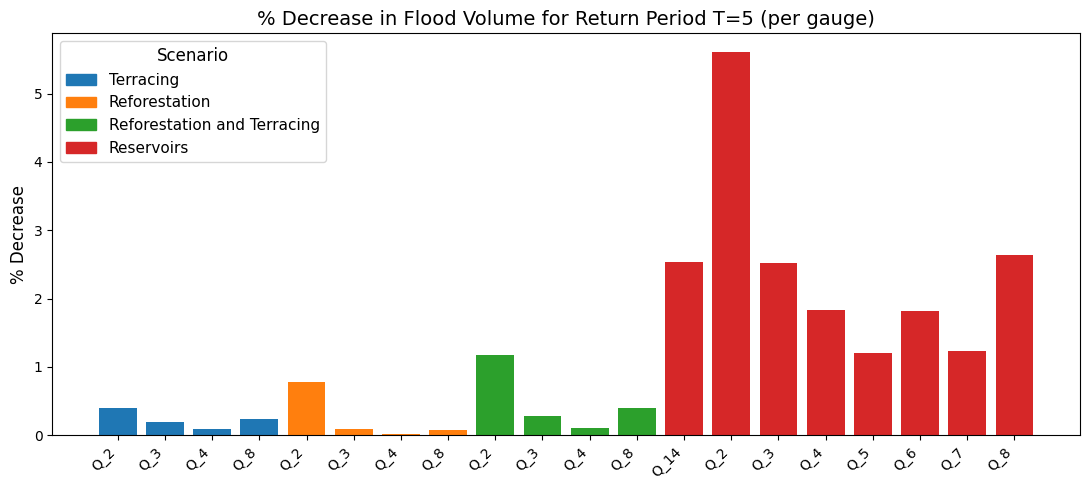

In [53]:
import matplotlib.pyplot as plt

# result_df: index = [5], columns = MultiIndex (scenario, gauge)
scenarios = result_df.columns.get_level_values(0).unique()
colors = plt.cm.tab10.colors  # Up to 10 distinct colors

def clean_scenario_name(name):
    return name.replace(" All Subcatchments", "")

fig, ax = plt.subplots(figsize=(11, 5))

bar_positions = []
bar_labels = []
bar_colors = []
bar_values = []

pos = 0
width = 0.8

for i, scenario in enumerate(scenarios):
    mask = result_df.columns.get_level_values(0) == scenario
    gauges = result_df.columns[mask].get_level_values(1)
    values = result_df.loc[5, scenario].values.flatten()
    n = len(gauges)
    bar_positions.extend(range(pos, pos + n))
    bar_labels.extend(gauges)  # Only gauge names as labels
    bar_colors.extend([colors[i % len(colors)]] * n)
    bar_values.extend(values)
    pos += n

ax.bar(bar_positions, bar_values, color=bar_colors, width=width)

ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels, rotation=45, ha='right')
ax.set_ylabel('% Decrease', fontsize=12)
ax.set_title('% Decrease in Flood Volume for Return Period T=5 (per gauge)', fontsize=14)

# Add legend for scenarios (multiheader colors), cleaned names
from matplotlib.patches import Patch
legend_handles = [Patch(color=colors[i % len(colors)], label=clean_scenario_name(scenario)) for i, scenario in enumerate(scenarios)]
ax.legend(handles=legend_handles, title="Scenario", loc='upper left', fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.savefig("interpolated_percent_decrease_for_individual_NBS_T5_bar_chart.png", dpi=300)
plt.show()
